Download [austin_weather.csv](https://drive.google.com/uc?export=download&id=10JkPB2hhDmkVUoCGFP6gpoRL1mvx0OPf)



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/My Drive/Colab Notebooks/Tugas Hari 4 Pekan 3 - Abdul Jabbar Hafizh/austin_weather.csv'
df = pd.read_csv(path)
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,T,


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

<h2>Soal 1: Visualisasi Scatter Plot Perbandingan Kuantitatif</h2>

Pada tugas kali ini kita akan mengamati nilai DewPointAvg (F) dengan mengamati nilai  HumidityAvg (%), TempAvg (F), dan WindAvg (MPG)

Perhatikan bahwa data kita tidaklah siap untuk di analisis, salah satunya tipe data dari DewPointAvg (F), HumidityAvg (%), dan WindAvg (MPG) adalah object, padahalnya data nya ber isi numeric. maka :
- Ubahlah tipe data tersebut menjadi tipe data float

Kemudian: 

- Kalian tidak akan dengan mudah mengubah tipe data tersebut karena column tersebut mempunyai nilai '-' yang dimana tidak bisa di ubah ke bentuk float, maka replace lah terlebih dahulu data yang bernilai '-' dengan nilai NaN, gunakan method .replace(). baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
- Isi nilai nan dengan nilai sebelumnya di row tersebut. gunakan method .fillna() dengan argument method bernilai 'ffill', baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
- Sekarang ubah tipe datanya dengan float, gunakan method .astype(), baca dokumentasi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html

Setelah ini sebagian data siap untuk di jadikan bahan analisis. maka:

Buahlah visualisasi perbandingan kuantitatif scatter plot, sehingga menghasilkan gambar seperti dibawah:

ket: 

- colormap adalah 'coolwarm'
- berikat warna terhadap setiap data poin dengan nilai dari column TempAvgF
- berikan size terhadap setiap data poin dengan nilai dari column WindAvgMPH, kalikan dengan 20 agar size terlihat lebih besar


Berikan pendapat dari insight yang bisa di dapat dari visualisasi perbandingan kuantitatif ini!!!

![alt text](https://drive.google.com/uc?id=1Pp5oIc-39mcw2vrw6xgCRM9GsvyRtPI5)

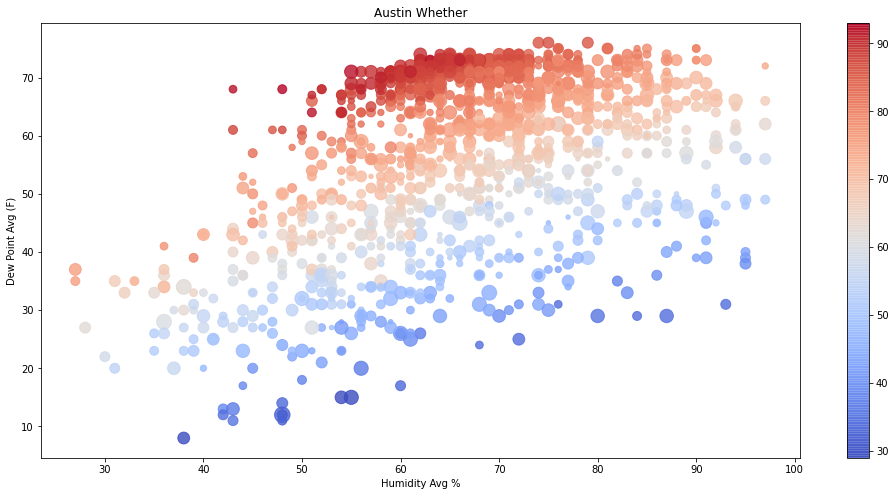

In [3]:
# code here
# Replace Values
df=df.replace('-', np.NaN)
df=df.fillna(method='ffill')

# Change data type to float
df['DewPointAvgF']=df['DewPointAvgF'].astype(float)
df['HumidityAvgPercent']=df['HumidityAvgPercent'].astype(float)
df['WindAvgMPH']=df['WindAvgMPH'].astype(float)

# Ploting
fig, ax = plt.subplots(figsize=(17,8))
wheather=ax.scatter(df['HumidityAvgPercent'], df['DewPointAvgF'], c=df['TempAvgF'], cmap='coolwarm', s=df['WindAvgMPH']*20, alpha=0.8)
fig.colorbar(wheather)

ax.set_xlabel('Humidity Avg %')
ax.set_ylabel('Dew Point Avg (F)')
ax.set_title('Austin Whether')
plt.show()

# Insight
Insight dari hasil visualisasi kondisi cuaca di austin menunjukkan bahwa jika titik 'Dew Point / titik embun' naik maka tingkat 'humidity / kelembaban' juga naik. Hal yang sama berlaku jika turun.

---

---

Downoad  <a href="https://blog.sanbercode.com/wp-content/uploads/2020/05/vgsales.csv">vgsales.csv</a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

path2 = '/content/drive/My Drive/Colab Notebooks/Tugas Hari 4 Pekan 3 - Abdul Jabbar Hafizh/vgsales.csv'
df = pd.read_csv(path2)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<h2>Soal 2: Preparing Data</h2>

Manipulasi data tersebut dengan menggroupkan berdasarkan Genre, kemudian ambil rata2 penjualan untuk setiap Region Kecuali Global_Sales berdasarkan kategori Genre.

In [14]:
#code here
mean_df = df.groupby('Genre')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].mean()
mean_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,0.264726,0.158323,0.048236,0.056508
Adventure,0.082271,0.049868,0.040490,0.013072
Fighting,0.263667,0.119481,0.103007,0.043255
Misc,0.235906,0.124198,0.061967,0.043312
Platform,0.504571,0.227573,0.147596,0.058228
Puzzle,0.212680,0.087251,0.098471,0.021564
Racing,0.287766,0.190865,0.045388,0.061865
Role-Playing,0.219946,0.126384,0.236767,0.040060
Shooter,0.444733,0.239137,0.029221,0.078389


Expected Output:

![alt text](https://drive.google.com/uc?id=1dR4vthSt22gM_LdfSBZCMIKPL6xd7nVl)

---

<h2>Soal 3: Perbandingan Kuantitatif Barplot - Grouping Visualisasi Dengan Barplot</h2>

1. Visualisasikan gambar yang tadi kita manipulasi, untuk menghasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

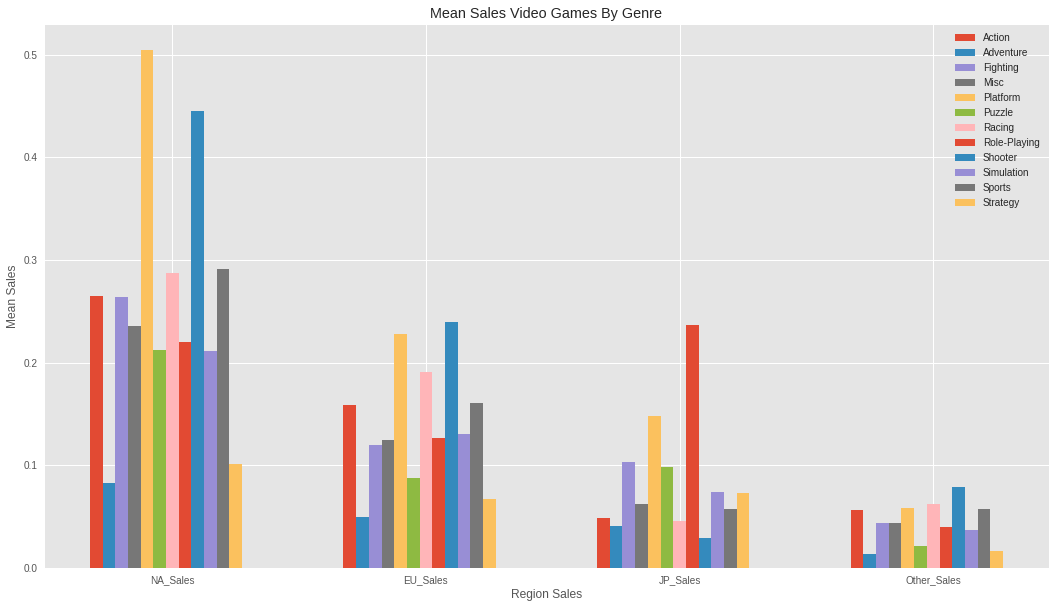

In [57]:
#code here
x = np.arange(len(mean_score.columns))
# x = np.arange(0, 12, 2)
y = mean_df.loc['Action']
y2 = mean_df.loc['Adventure']
y3 = mean_df.loc['Fighting']
y4 = mean_df.loc['Misc']
y5 = mean_df.loc['Platform']
y6 = mean_df.loc['Puzzle']
y7 = mean_df.loc['Racing']
y8 = mean_df.loc['Role-Playing']
y9 = mean_df.loc['Shooter']
y10 = mean_df.loc['Simulation']
y11 = mean_df.loc['Sports']
y12 = mean_df.loc['Strategy']

# plot data
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(18,10))
ax.bar(x, y, width=0.05, label='Action')
ax.bar(x+0.05, y2, width=0.05, label='Adventure')
ax.bar(x+0.1, y3, width=0.05, label='Fighting')
ax.bar(x+0.15, y4, width=0.05, label='Misc')
ax.bar(x+0.2, y5, width=0.05, label='Platform')
ax.bar(x+0.25, y6, width=0.05, label='Puzzle')
ax.bar(x+0.3, y7, width=0.05, label='Racing')
ax.bar(x+0.35, y8, width=0.05, label='Role-Playing')
ax.bar(x+0.4, y9, width=0.05, label='Shooter')
ax.bar(x+0.45, y10, width=0.05, label='Simulation')
ax.bar(x+0.5, y11, width=0.05, label='Sports')
ax.bar(x+0.55, y12, width=0.05, label='Strategy')
ax.legend(loc='upper right', frameon=True)

ax.set_ylabel('Mean Sales')
ax.set_xlabel('Region Sales')
ax.set_title('Mean Sales Video Games By Genre')
ax.set_xticks([0.3,1.3,2.3,3.3])
ax.set_xticklabels(list(list(mean_score.columns)))
plt.legend(loc=1)
fig.show()


Jawab:

Expected Output:

![alt text](https://drive.google.com/uc?id=1A2s9Uy2i471VEYIZqMoVUIlZnVOUc8ha)

---

<h2>Soal 4: Perbandingan Kuantitatif Barplot - Stack Barplot</h2>

1. Visualisasikan gambar yang tadi kita manipulasi, untuk menhasilkan visualisasi seperti di bawah ini
2. Tuliskan apa insight yang bisa kamu dapat dari visualisasi tersebut

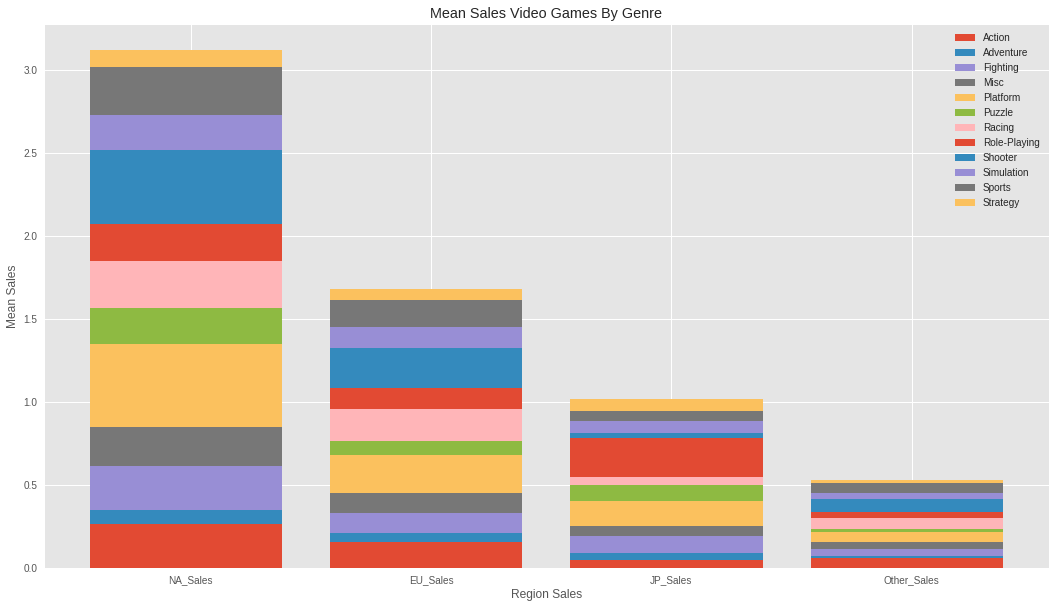

In [60]:
#code here
x = np.arange(len(mean_score.columns))
y = mean_df.loc['Action']
y2 = mean_df.loc['Adventure']
y3 = mean_df.loc['Fighting']
y4 = mean_df.loc['Misc']
y5 = mean_df.loc['Platform']
y6 = mean_df.loc['Puzzle']
y7 = mean_df.loc['Racing']
y8 = mean_df.loc['Role-Playing']
y9 = mean_df.loc['Shooter']
y10 = mean_df.loc['Simulation']
y11 = mean_df.loc['Sports']
y12 = mean_df.loc['Strategy']

# plot data
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(18,10))
ax.bar(x, y, label='Action')
ax.bar(x, y2, bottom=y, label='Adventure')
ax.bar(x, y3, bottom=y+y2, label='Fighting')
ax.bar(x, y4, bottom=y+y2+y3, label='Misc')
ax.bar(x, y5, bottom=y+y2+y3+y4, label='Platform')
ax.bar(x, y6, bottom=y+y2+y3+y4+y5, label='Puzzle')
ax.bar(x, y7, bottom=y+y2+y3+y4+y5+y6, label='Racing')
ax.bar(x, y8, bottom=y+y2+y3+y4+y5+y6+y7, label='Role-Playing')
ax.bar(x, y9, bottom=y+y2+y3+y4+y5+y6+y7+y8, label='Shooter')
ax.bar(x, y10, bottom=y+y2+y3+y4+y5+y6+y7+y8+y9, label='Simulation')
ax.bar(x, y11, bottom=y+y2+y3+y4+y5+y6+y7+y8+y9+y10, label='Sports')
ax.bar(x, y12, bottom=y+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11, label='Strategy')

ax.set_ylabel('Mean Sales')
ax.set_xlabel('Region Sales')
ax.set_title('Mean Sales Video Games By Genre')
ax.set_xticks([0.02,1.02,2.02,3.02])
ax.set_xticklabels(list(list(mean_score.columns)))
plt.legend(loc=1)
fig.show()


Jawab:

Expected Output:

![alt text](https://drive.google.com/uc?id=1_yis-3aZsEbsk68tpoPHoNlFftaz2GrO)